
# 📊 Dashboard 10: Análisis de Comportamiento por Día de la Semana

Este notebook analiza patrones de comportamiento de clientes por día de la semana,
incluyendo ticket promedio diario, actividad por hora, y días con promociones.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

archivo_excel = "/content/Datos_Restaurante_Ejemplo_6meses.xlsx"
xls = pd.ExcelFile(archivo_excel)

ventas = xls.parse('Ventas')
promos = xls.parse('Promociones')

ventas['fecha'] = pd.to_datetime(ventas['fecha'])
ventas['hora'] = pd.to_datetime(ventas['hora'], format='%H:%M').dt.hour
ventas['dia_semana'] = ventas['fecha'].dt.day_name()


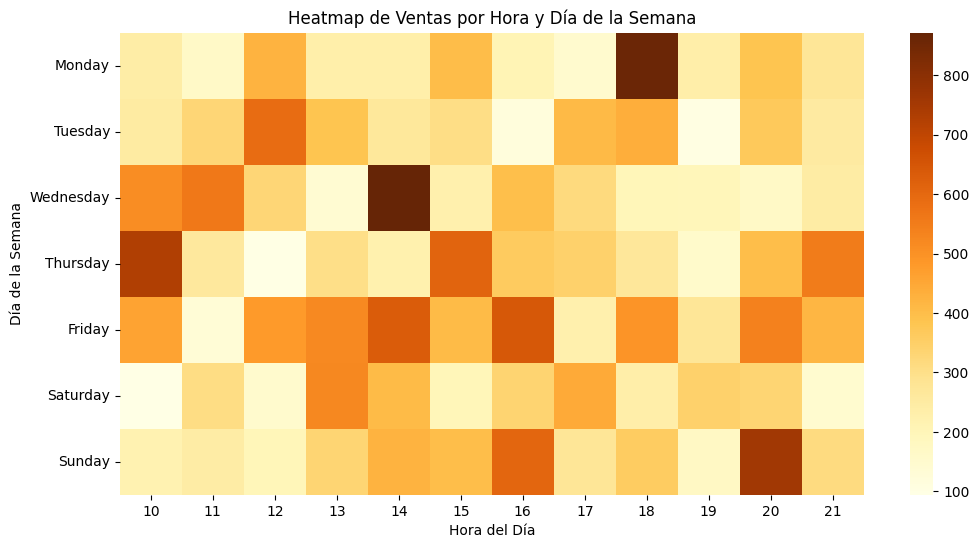

In [2]:

pivot = ventas.pivot_table(values='total', index='dia_semana', columns='hora', aggfunc='sum').fillna(0)
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(orden_dias)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlOrBr")
plt.title("Heatmap de Ventas por Hora y Día de la Semana")
plt.xlabel("Hora del Día")
plt.ylabel("Día de la Semana")
plt.show()


In [3]:

ventas_por_dia = ventas.groupby('dia_semana')['total'].sum().reindex(orden_dias)
dia_fuerte = ventas_por_dia.idxmax()
print(f"📌 Día con más ventas: {dia_fuerte}")


📌 Día con más ventas: Friday


In [4]:

promos['fecha_inicio'] = pd.to_datetime(promos['fecha_inicio'])
promos['fecha_fin'] = pd.to_datetime(promos['fecha_fin'])

# Expansión de fechas
filas_expandidas = []
for _, row in promos.iterrows():
    rango = pd.date_range(start=row['fecha_inicio'], end=row['fecha_fin'])
    for fecha in rango:
        filas_expandidas.append({
            'nombre': row['nombre_promocion'],
            'fecha': fecha,
            'dia_semana': fecha.day_name()
        })

promos_expandidas = pd.DataFrame(filas_expandidas)


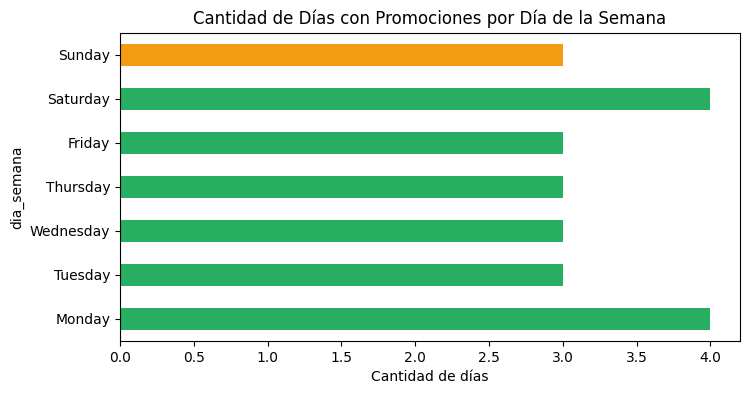

In [5]:

conteo_dias = promos_expandidas['dia_semana'].value_counts().reindex(orden_dias).fillna(0)

plt.figure(figsize=(8,4))
conteo_dias.plot(kind='barh', color=['#f39c12' if d == 'Sunday' else '#27ae60' for d in conteo_dias.index])
plt.title("Cantidad de Días con Promociones por Día de la Semana")
plt.xlabel("Cantidad de días")
plt.show()
